In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

sns.set(font_scale=1.5)

In [2]:
sat_range = pd.DataFrame({'Size':[20,40,60,80]})
df = pd.concat([
    pd.read_csv('logs-scale/log-SAT-20-run.txt'),
    pd.read_csv('logs-scale/log-SAT-40-run.txt'),
    pd.read_csv('logs-scale/log-SAT-60-run.txt'),
    pd.read_csv('logs-scale/log-SAT-80-run.txt'),
    pd.read_csv('logs-scale/log-SH-100-run.txt'),
    pd.read_csv('logs-scale/log-SH-200-run.txt'),
    pd.read_csv('logs-scale/log-SH-300-run.txt'),
    pd.read_csv('logs-scale/log-SH-400-run.txt'),
    pd.read_csv('logs-scale/log-SRV-10-run.txt'),
    pd.read_csv('logs-scale/log-SRV-100-run.txt'),
    pd.read_csv('logs-scale/log-SRV-1000-run.txt'),
    pd.read_csv('logs-scale/log-SRV-10000-run.txt') 
    ],ignore_index=True)
df['standalone.engine[ms]']=df['standalone.total[ms]']-(df['standalone.sync[ms]']+df["standalone.prop[ms]"])
df['incremental.engine[ms]']=df['incremental.total[ms]']-(df['incremental.sync[ms]']+df["incremental.prop[ms]"])

df['incremental.total[s]'] = df['incremental.total[ms]']/1000
df['problog.total[s]'] = df['problog.total[ms]']/1000

PROPS = {
    'boxprops':{'facecolor':'seagreen', 'edgecolor':'black'},
#    'medianprops':{'color':'blue'},
#    'whiskerprops':{'color':'black'},
#    'capprops':{'color':'black'}
}
meanprops={
    'marker':'o',
    'markerfacecolor':'white', 
    'markeredgecolor':'black',
    'markersize':'6'
}

## Tool scaling

In [ ]:
meanprops={'marker':'o',
    'markerfacecolor':'white', 
    'markeredgecolor':'black',
    'markersize':'6'}


def subScaleChart(df, ax, case, tool, dfy_name, sizes, ylabel=None, xlabel=None, legend=False, title=None, dfx_name="size"]):
    df = df[validResult(df, tool)]
    im = sns.boxplot(x=dfx_name, y=dfy_name, data=df_case_pl_ok, ax=ax, showmeans=True, meanprops=meanprops, **PROPS)
    im.axes.set_yscale('log')
    im.axes.set_ylabel(ylabel)
    im.axes.set_ylim(0.01, 1500)

    rate = df_case.groupby(['size']).count().reset_index()[['size','prefix']].rename(columns={'prefix':'count'}).astype({'count':'int'}).set_index(['size']).join(
        df_case[df_case['problog.timeout']==True].groupby(['size']).count().reset_index()[['size','prefix']].rename(columns={'prefix':'timeouts'}).astype({'timeouts':'int'}).set_index(['size']),
        how='outer'
    ).reset_index().fillna(0)
    rate['timeout %'] = rate['timeouts']/rate['count']*100
    print('SAT PL failure rate')
    print(rate)

im = sns.lineplot(data=rate, x='size',y='timeout %', ax=ax2.twiny().twinx(), color='red', legend=False, linewidth=3)
im.axes.set_ylim(-1,101)
im.axes.set_ylabel(None)
im.axes.set_xlim(10,90)
im.axes.set_xticks([])



    
fig, axes = plt.subplots(3, 3, figsize=(18,18))
fig.suptitle(None)



fig.savefig("figures/scaling.pdf", bbox_inches='tight')

## Relative PGQ component scaling

SAT PGQ failure rate
   size  count  timeouts  timeout %
0    20     51       0.0   0.000000
1    40     51       0.0   0.000000
2    60     51       0.0   0.000000
3    80     51       1.0   1.960784
SAT PL failure rate
   size  count  timeouts  timeout %
0    20     51       0.0   0.000000
1    40     51       0.0   0.000000
2    60     51       2.0   3.921569
3    80     51      34.0  66.666667


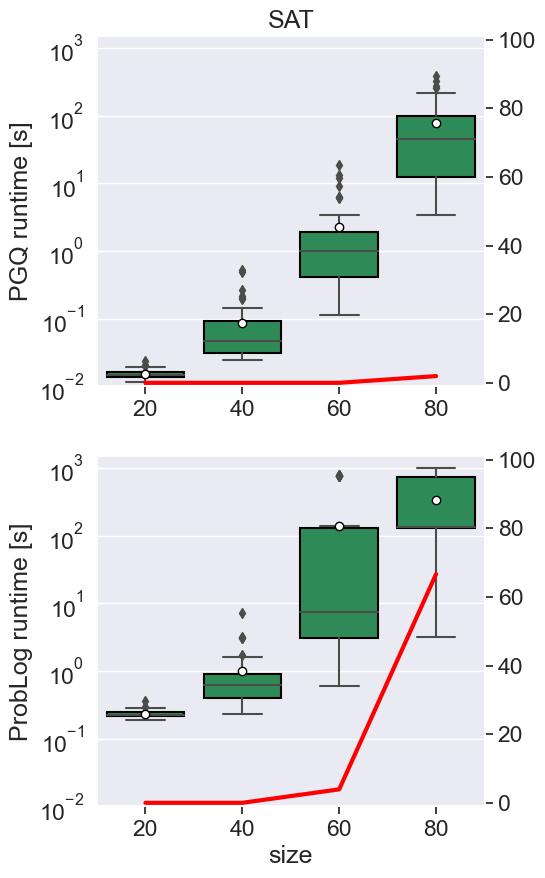

In [3]:
fig, (ax1,ax2) = plt.subplots(figsize=(5,10),nrows=2,ncols=1)

ax1.title.set_text('SAT')

df_case=df[df['prefix']=='SAT']
range = pd.DataFrame({'size':[20,40,60,80]})
df_case_inc_ok = df_case[df_case['incremental.timeout']==False].set_index(['size']).join(range.set_index(['size']),how='outer').reset_index()
df_case_pl_ok = df_case[df_case['problog.timeout']==False].set_index(['size']).join(range.set_index(['size']),how='outer').reset_index()
###################################
im = sns.boxplot(x='size', y="incremental.total[s]", data=df_case_inc_ok, ax=ax1, showmeans=True, meanprops=meanprops, **PROPS)
im.axes.set_yscale('log')
im.axes.set_ylabel('PGQ runtime [s]')
im.axes.set_ylim(0.01, 1500)
im.axes.set_xlabel(None)

rate = df_case.groupby(['size']).count().reset_index()[['size','prefix']].rename(columns={'prefix':'count'}).astype({'count':'int'}).set_index(['size']).join(
    df_case[df_case['incremental.timeout']==True].groupby(['size']).count().reset_index()[['size','prefix']].rename(columns={'prefix':'timeouts'}).astype({'timeouts':'int'}).set_index(['size']),
    how='outer'
).reset_index().fillna(0)
rate['timeout %'] = rate['timeouts']/rate['count']*100
print('SAT PGQ failure rate')
print(rate)

im = sns.lineplot(data=rate, x='size',y='timeout %', ax=ax1.twiny().twinx(), color='red', legend=False, linewidth=3)
im.axes.set_ylim(-1,101)
im.axes.set_ylabel(None)
im.axes.set_xlim(10,90)
im.axes.set_xlabel(None)
im.axes.set_xticks([])

plt.grid()

###################################
im = sns.boxplot(x='size', y="problog.total[s]", data=df_case_pl_ok, ax=ax2, showmeans=True, meanprops=meanprops, **PROPS)
im.axes.set_yscale('log')
im.axes.set_ylabel('ProbLog runtime [s]')
im.axes.set_ylim(0.01, 1500)

rate = df_case.groupby(['size']).count().reset_index()[['size','prefix']].rename(columns={'prefix':'count'}).astype({'count':'int'}).set_index(['size']).join(
    df_case[df_case['problog.timeout']==True].groupby(['size']).count().reset_index()[['size','prefix']].rename(columns={'prefix':'timeouts'}).astype({'timeouts':'int'}).set_index(['size']),
    how='outer'
).reset_index().fillna(0)
rate['timeout %'] = rate['timeouts']/rate['count']*100
print('SAT PL failure rate')
print(rate)

im = sns.lineplot(data=rate, x='size',y='timeout %', ax=ax2.twiny().twinx(), color='red', legend=False, linewidth=3)
im.axes.set_ylim(-1,101)
im.axes.set_ylabel(None)
im.axes.set_xlim(10,90)
im.axes.set_xticks([])
plt.grid()
###################################
plt.savefig("figures/scale-sat.pdf", format="pdf", bbox_inches="tight")
plt.show()

SRV PGQ failure rate
   size  count  timeouts  timeout %
0   1.0     51       0.0   0.000000
1   2.0     51       0.0   0.000000
2   3.0     51       0.0   0.000000
3   4.0     51      27.0  52.941176
SRV PL failure rate
   size  count  timeouts  timeout %
0   1.0     51       0.0        0.0
1   2.0     51       0.0        0.0
2   3.0     51       0.0        0.0
3   4.0     51       0.0        0.0


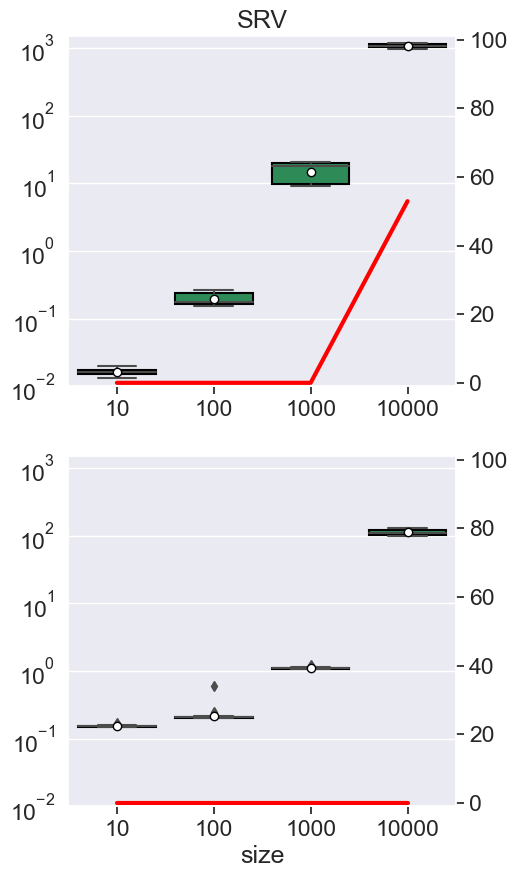

In [4]:
fig, (ax1,ax2) = plt.subplots(figsize=(5,10),nrows=2,ncols=1)

ax1.title.set_text('SRV')

df_case=df[df['prefix']=='SRV']
range = pd.DataFrame({'size':[10,100,1000,10000]})
df_case_inc_ok = df_case[df_case['incremental.timeout']==False].set_index(['size']).join(range.set_index(['size']),how='outer').reset_index()
df_case_pl_ok = df_case[df_case['problog.timeout']==False].set_index(['size']).join(range.set_index(['size']),how='outer').reset_index()
###################################
im = sns.boxplot(x='size', y="incremental.total[s]", data=df_case_inc_ok, ax=ax1, showmeans=True, meanprops=meanprops, **PROPS)
im.axes.set_yscale('log')
im.axes.set_ylabel(None)
im.axes.set_ylim(0.01, 1500)
im.axes.set_xlabel(None)

rate = df_case.groupby(['size']).count().reset_index()[['size','prefix']].rename(columns={'prefix':'count'}).astype({'count':'int'}).set_index(['size']).join(
    df_case[df_case['incremental.timeout']==True].groupby(['size']).count().reset_index()[['size','prefix']].rename(columns={'prefix':'timeouts'}).astype({'timeouts':'int'}).set_index(['size']),
    how='outer'
).reset_index().fillna(0)
rate['timeout %'] = rate['timeouts']/rate['count']*100
rate['size'] = np.log10(rate['size'])
print('SRV PGQ failure rate')
print(rate)

im = sns.lineplot(data=rate, x='size',y='timeout %', ax=ax1.twiny().twinx(), color='red', legend=False, linewidth=3)
im.axes.set_ylim(-1,101)
im.axes.set_ylabel(None)
im.axes.set_xlim(0.5,4.5)
im.axes.set_xlabel(None)
im.axes.set_xticks([])

plt.grid()

###################################
im = sns.boxplot(x='size', y="problog.total[s]", data=df_case_pl_ok, ax=ax2, showmeans=True, meanprops=meanprops, **PROPS)
im.axes.set_yscale('log')
im.axes.set_ylabel(None)
im.axes.set_ylim(0.01, 1500)


rate = df_case.groupby(['size']).count().reset_index()[['size','prefix']].rename(columns={'prefix':'count'}).astype({'count':'int'}).set_index(['size']).join(
    df_case[df_case['problog.timeout']==True].groupby(['size']).count().reset_index()[['size','prefix']].rename(columns={'prefix':'timeouts'}).astype({'timeouts':'int'}).set_index(['size']),
    how='outer'
).reset_index().fillna(0)
rate['timeout %'] = rate['timeouts']/rate['count']*100
rate['size'] = np.log10(rate['size'])
print('SRV PL failure rate')
print(rate)

im = sns.lineplot(data=rate, x='size',y='timeout %', ax=ax2.twiny().twinx(), color='red', legend=False, linewidth=3)
im.axes.set_ylim(-1,101)
im.axes.set_ylabel(None)
im.axes.set_xlim(0.5,4.5)
im.axes.set_xlabel(None)
im.axes.set_xticks([])
plt.grid()
###################################
plt.savefig("figures/scale-srv.pdf", format="pdf", bbox_inches="tight")
plt.show()

SH PGQ failure rate
   size  count  timeouts  timeout %
0   100     51       0.0        0.0
1   200     51       0.0        0.0
2   300     51       0.0        0.0
3   400     51      51.0      100.0
SH PL failure rate
   size  count  timeouts  timeout %
0   100     51       0.0        0.0
1   200     51       0.0        0.0
2   300     51       0.0        0.0
3   400     51       0.0        0.0


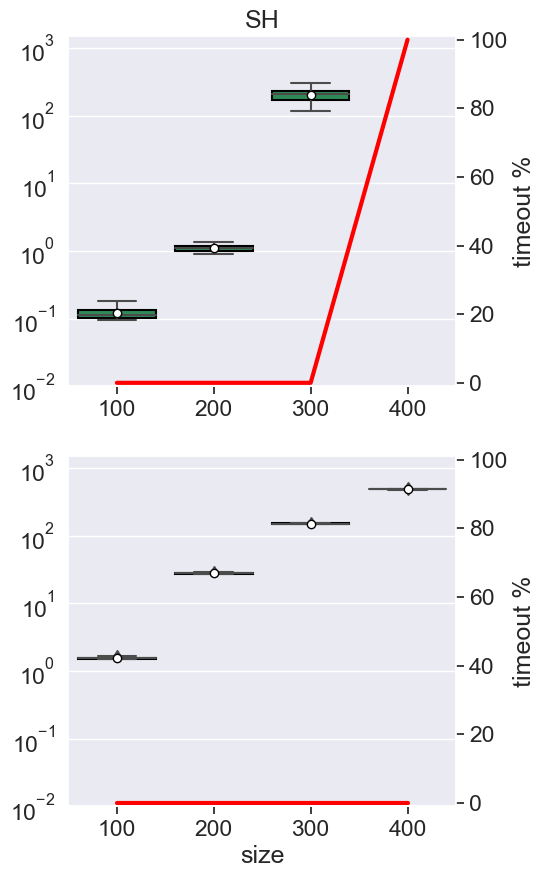

In [5]:
fig, (ax1,ax2) = plt.subplots(figsize=(5,10),nrows=2,ncols=1)

ax1.title.set_text('SH')

df_case=df[df['prefix']=='SH']


range = pd.DataFrame({'size':[100,200,300,400]})
df_case_inc_ok = df_case[df_case['incremental.timeout']==False].set_index(['size']).join(range.set_index(['size']),how='outer').reset_index()
df_case_pl_ok = df_case[df_case['problog.timeout']==False].set_index(['size']).join(range.set_index(['size']),how='outer').reset_index()
###################################
im = sns.boxplot(x='size', y="incremental.total[s]", data=df_case_inc_ok, ax=ax1, showmeans=True, meanprops=meanprops, **PROPS)
im.axes.set_yscale('log')
im.axes.set_ylabel(None)
im.axes.set_ylim(0.01, 1500)
im.axes.set_xlabel(None)

rate_i = df_case.groupby(['size']).count().reset_index()[['size','prefix']].rename(columns={'prefix':'count'}).astype({'count':'int'}).set_index(['size']).join(
    df_case[df_case['incremental.timeout']==True].groupby(['size']).count().reset_index()[['size','prefix']].rename(columns={'prefix':'timeouts'}).astype({'timeouts':'int'}).set_index(['size']),
    how='outer'
).reset_index().fillna(0)
rate_i['timeout %'] = rate_i['timeouts']/rate_i['count']*100
print('SH PGQ failure rate')
print(rate_i)

im = sns.lineplot(data=rate_i, x='size',y='timeout %', ax=ax1.twiny().twinx(), color='red', legend=False, linewidth=3)
im.axes.set_ylim(-1,101)
im.axes.set_ylabel('timeout %')
im.axes.set_xlim(50, 450)
im.axes.set_xlabel(None)
im.axes.set_xticks([])

plt.grid()

###################################
im = sns.boxplot(x='size', y="problog.total[s]", data=df_case_pl_ok, ax=ax2, showmeans=True, meanprops=meanprops, **PROPS)
im.axes.set_yscale('log')
im.axes.set_ylabel(None)
im.axes.set_ylim(0.01, 1500)


rate = df_case.groupby(['size']).count().reset_index()[['size','prefix']].rename(columns={'prefix':'count'}).astype({'count':'int'}).set_index(['size']).join(
    df_case[df_case['problog.timeout']==True].groupby(['size']).count().reset_index()[['size','prefix']].rename(columns={'prefix':'timeouts'}).astype({'timeouts':'int'}).set_index(['size']),
    how='outer'
).reset_index().fillna(0)
rate['timeout %'] = rate['timeouts']/rate['count']*100
print('SH PL failure rate')
print(rate)

im = sns.lineplot(data=rate, x='size',y='timeout %', ax=ax2.twiny().twinx(), color='red', legend=False, linewidth=3)
im.axes.set_ylim(-1,101)
im.axes.set_ylabel("timeout %")
im.axes.set_xlim(50, 450)
im.axes.set_xlabel(None)
im.axes.set_xticks([])
plt.grid()
###################################
plt.savefig("figures/scale-sh.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [6]:
#range = pd.DataFrame({'size':[10,100,1000,10000]})
def filter_completed(df, kind):
    tmp = df[df[f'{kind}.timeout']==False].filter(regex=(f'prefix|size|{kind}\..*')).groupby(['prefix', 'size']).aggregate('mean').reset_index()
    tmp['x'] = tmp['prefix']+" "+tmp['size'].astype(str)

    return tmp


#df_pgq_ok = df[df['incremental.timeout']==False].filter(regex=('prefix|size|incremental\..*')).groupby(['prefix', 'size']).aggregate('mean').reset_index()
#df_pgq_ok['x'] = df_pgq_ok['prefix']+" "+df_pgq_ok['size'].astype(str)

#df_pl_ok = df[df['problog.timeout']==False].filter(regex=('prefix|size|problog\..*')).groupby(['prefix', 'size']).aggregate('mean').reset_index()
#df_pl_ok['x'] = df_pl_ok['prefix']+" "+df_pl_ok['size'].astype(str)

df_pgq_ok = filter_completed(df, "incremental")
df_pgq_ok['TT'] = df_pgq_ok['incremental.engine[ms]'] + df_pgq_ok['incremental.sync[ms]'] + df_pgq_ok['incremental.prop[ms]']
df_pgq_ok['QPT%'] = df_pgq_ok['incremental.engine[ms]'] / df_pgq_ok['TT'] * 100
df_pgq_ok['EPT%'] = df_pgq_ok['incremental.prop[ms]'] / df_pgq_ok['TT'] * 100
df_pgq_ok['SYNC%'] = df_pgq_ok['incremental.sync[ms]'] / df_pgq_ok['TT'] * 100


df_pl_ok = filter_completed(df, "problog")
df_pl_ok['TT'] = df_pl_ok['problog.trafo[ms]'] + df_pl_ok['problog.evaluation[ms]']
df_pl_ok['Transformation %'] = df_pl_ok['problog.trafo[ms]'] / df_pl_ok['TT'] * 100
df_pl_ok['Analysis %'] = df_pl_ok['problog.evaluation[ms]'] / df_pl_ok['TT'] * 100

C:\Users\matfo50\AppData\Local\Temp\ipykernel_17916\1648609684.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df[df[f'{kind}.timeout']==False].filter(regex=(f'prefix|size|{kind}\..*')).groupby(['prefix', 'size']).aggregate('mean').reset_index()
C:\Users\matfo50\AppData\Local\Temp\ipykernel_17916\1648609684.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df[df[f'{kind}.timeout']==False].filter(regex=(f'prefix|size|{kind}\..*')).groupby(['prefix', 'size']).aggregate('mean').reset_index()


PGQ mean times
   prefix   size  incremental.total[ms]  incremental.sync[ms]  \
0     SAT     20           1.512125e+01              2.209363   
1     SAT     40           8.562446e+01              2.327682   
2     SAT     60           2.255876e+03              2.486629   
3     SAT     80           7.708429e+04             28.348107   
4      SH    100           1.197735e+02              3.324589   
5      SH    200           1.106771e+03             12.104601   
6      SH    300           2.046068e+05             47.195833   
7     SRV     10           1.636965e+01              2.396744   
8     SRV    100           1.956604e+02              5.258893   
9     SRV   1000           1.495796e+04            322.626986   
10    SRV  10000           1.079425e+06          43415.615725   

    incremental.prop[ms]  incremental.timeout  incremental.engine[ms]  \
0               2.290023                  0.0               10.621860   
1              67.358617                  0.0             

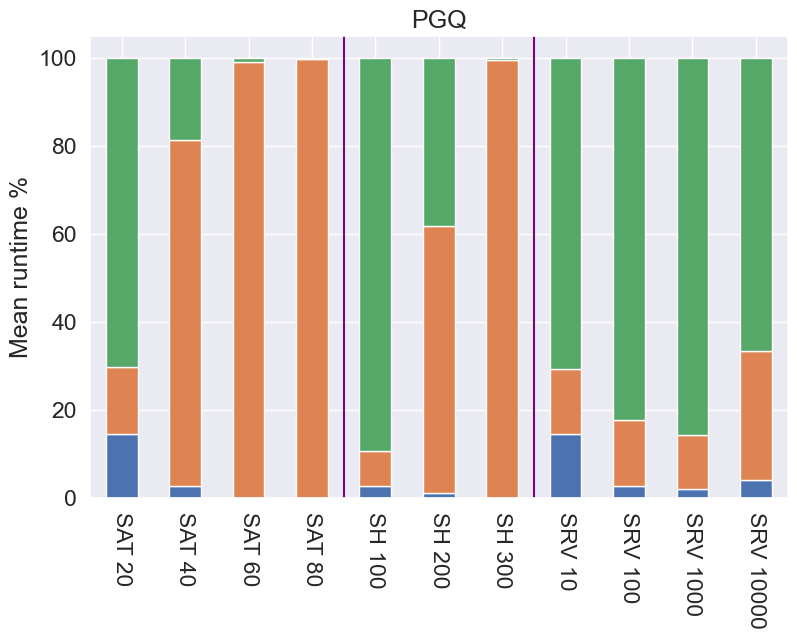

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(9,6))
fig.suptitle('')

df_pgq_ok.plot(kind='bar',ax=ax, x='x',y=['SYNC%','EPT%','QPT%'],stacked=True,legend=False)
ax.tick_params(axis='x', labelrotation=-90)
ax.set(title='PGQ', ylabel='Mean runtime %', xlabel=None)
#axes[0].get_legend().set_visible(False)
ax.axvline(3.5,0,1,color='purple')
ax.axvline(6.5,0,1,color='purple')
print('PGQ mean times')
print(df_pgq_ok)

fig.savefig("figures/scale-reative.pdf", bbox_inches='tight')

In [8]:

df_case=df


range = pd.DataFrame({'size':[20,40,60,80,100,200,300,400,10,100,1000,10000]})

df_case_inc_ok = df_case[df_case['incremental.timeout']==False].set_index(['size']).join(range.set_index(['size']),how='outer').reset_index()
df_case_pl_ok = df_case[df_case['problog.timeout']==False].set_index(['size']).join(range.set_index(['size']),how='outer').reset_index()

df_mean = df_case.groupby(['prefix','size']).mean().reset_index()[['prefix','size','incremental.total[ms]','problog.total[ms]']]
df_mean['incremental.total[ms]'] = df_mean['incremental.total[ms]'].apply(lambda x : '{:_.2f}'.format(x))
print(df_mean)


   prefix   size incremental.total[ms]  problog.total[ms]
0     SAT     20                 15.12         232.976396
1     SAT     40                 85.62        1001.088570
2     SAT     60              2_255.88      179030.995348
3     SAT     80            101_997.51      912485.169902
4      SH    100                119.77        1564.217811
5      SH    200              1_106.77       27846.734079
6      SH    300            204_606.83      151520.355700
7      SH    400          1_291_132.82      491049.084692
8     SRV     10                 16.37         152.576787
9     SRV    100                195.66         215.796370
10    SRV   1000             14_957.96        1100.641617
11    SRV  10000          1_079_424.82      113204.440094


C:\Users\matfo50\AppData\Local\Temp\ipykernel_17916\2673128738.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df_case.groupby(['prefix','size']).mean().reset_index()[['prefix','size','incremental.total[ms]','problog.total[ms]']]
